### Student Information
Name: 陳俊儒

Student ID: 106062402

---

### Instructions

- Download the dataset provided in this [link](https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences#). The sentiment dataset contains a `sentence` and `score` label. Read what the dataset is about on the link provided before you start exploring it. 


- Then, you are asked to apply each of the data exploration and data operation techniques learned in the [first lab session](https://goo.gl/Sg4FS1) on the new dataset. You don't need to explain all the procedures as we did in the notebook, but you are expected to provide some **minimal comments** explaining your code. You are also expected to use the same libraries used in the first lab session. You are allowed to use and modify the `helper` functions we provided in the first lab session or create your own. Also, be aware that the helper functions may need modification as you are dealing with a completely different dataset. This part is worth 80% of your grade!


- After you have completed the operations, you should attempt the **bonus exercises** provided in the [notebook](https://goo.gl/Sg4FS1) we used for the first lab session. There are six (6) additional exercises; attempt them all, as it is part of your grade (10%). 


- You are also expected to tidy up your notebook and attempt new data operations that you have learned so far in the Data Mining course. Surprise us! This segment is worth 10% of your grade.


- After completing all the above tasks, you are free to remove this header block and submit your assignment following the guide provided in the `README.md` file of the assignment's [repository](https://github.com/omarsar/data_mining_hw_1). 

In [1]:
# necessary for when working with external scripts
%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np
import nltk
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
import plotly.plotly as py
import plotly.graph_objs as go
import plotly 
#plotly.tools.set_credentials_file(username='Dan381', api_key='a7HkDwqn4k7KS2BeGjet')
import math
import re
%matplotlib inline

# TA functions
import helpers.data_mining_helpers as dmh
import helpers.text_analysis as ta

# 1. Data source
Dataset:Sentiment Labelled Sentences Data Set
link: https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences

Data Set Information:

It contains sentences labelled with positive or negative sentiment. 

Format: 
sentence score 

Details: 
Score is either 1 (for positive) or 0 (for negative)	
The sentences come from three different websites/fields: 

imdb.com 
amazon.com 
yelp.com 

For each website, there exist 500 positive and 500 negative sentences. Those were selected randomly for larger datasets of reviews. 
We attempted to select sentences that have a clearly positive or negative connotaton, the goal was for no neutral sentences to be selected.

# 2. Data Preparation

In [2]:
# data class
class Sentence:
    def __init__(self):
        # sentence id
        self.sid = []
        # sentence
        self.data = []
        # score
        self.score =[]
        # score_name
        self.score_name =[]

# dataset location
dataset_files = ['./sentiment labelled sentences/amazon_cells_labelled.txt', 
                 './sentiment labelled sentences/imdb_labelled.txt', 
                 './sentiment labelled sentences/yelp_labelled.txt']

# intial data class
sentence = Sentence()


for fileName in dataset_files:
    # open and read each txt file
    with open (fileName, encoding = 'utf8') as input_fs:

        # pattern for the last digit in the setence
        pattern = re.compile(r"(\d+)$")

        for index, line in enumerate(input_fs):
            
            # store each sentence index
            sentence.sid.append(index)
            # store each sentence without last digit 
            sentence.data.append(line.rsplit('\t', 1)[0])

            # search if sentence contain a digit at the end
            has = pattern.search(line)
            # store the last digit 
            sentence.score.append(has.group(0))

            # if last digit equal 1, score_name: Positive else Negative
            if (has.group(0)== "1"):
                sentence.score_name.append("Positive")
            else:
                sentence.score_name.append("Negative")




In [3]:
# testset
print (sentence.sid[0:5])
print (sentence.data[0:5]) # data is working
print (sentence.score[0:5])
print (sentence.score_name[0:5])
print (len(sentence.data))

[0, 1, 2, 3, 4]
['So there is no way for me to plug it in here in the US unless I go by a converter.', 'Good case, Excellent value.', 'Great for the jawbone.', 'Tied to charger for conversations lasting more than 45 minutes.MAJOR PROBLEMS!!', 'The mic is great.']
['0', '1', '1', '0', '1']
['Negative', 'Positive', 'Positive', 'Negative', 'Positive']
3000


# 3.1 Converting Dictionary into Pandas dataframe
**Note:** This part is not provided in the original scikit learn tutorial

In [4]:
sentence.data[0:2]

['So there is no way for me to plug it in here in the US unless I go by a converter.',
 'Good case, Excellent value.']

In [5]:
X = pd.DataFrame.from_records(dmh.format_rows(sentence), columns= ['sentence'])

In [6]:
len(X)

3000

In [7]:
# add score to the dataframe
X['score'] = sentence.score

In [8]:
# add score name also
X['score_name'] = sentence.score_name

In [9]:
X[0:10]

,sentence,score,score_name
0,So there is no way for me to plug it in here i...,0,Negative
1,"Good case, Excellent value.",1,Positive
2,Great for the jawbone.,1,Positive
3,Tied to charger for conversations lasting more...,0,Negative
4,The mic is great.,1,Positive
5,I have to jiggle the plug to get it to line up...,0,Negative
6,If you have several dozen or several hundred c...,0,Negative
7,If you are Razr owner...you must have this!,1,Positive
8,"Needless to say, I wasted my money.",0,Negative
9,What a waste of money and time!.,0,Negative


# 3.2 Familiarizing yourself with the Data

In [10]:
X[0:10][["sentence", "score_name"]]

,sentence,score_name
0,So there is no way for me to plug it in here i...,Negative
1,"Good case, Excellent value.",Positive
2,Great for the jawbone.,Positive
3,Tied to charger for conversations lasting more...,Negative
4,The mic is great.,Positive
5,I have to jiggle the plug to get it to line up...,Negative
6,If you have several dozen or several hundred c...,Negative
7,If you are Razr owner...you must have this!,Positive
8,"Needless to say, I wasted my money.",Negative
9,What a waste of money and time!.,Negative


In [11]:
X[-11:-1]

,sentence,score,score_name
2989,I would avoid this place if you are staying in...,0,Negative
2990,The refried beans that came with my meal were ...,0,Negative
2991,Spend your money and time some place else.,0,Negative
2992,A lady at the table next to us found a live gr...,0,Negative
2993,the presentation of the food was awful.,0,Negative
2994,I can't tell you how disappointed I was.,0,Negative
2995,I think food should have flavor and texture an...,0,Negative
2996,Appetite instantly gone.,0,Negative
2997,Overall I was not impressed and would not go b...,0,Negative
2998,"The whole experience was underwhelming, and I ...",0,Negative


In [12]:
X.iloc[::10, :][0:10]

,sentence,score,score_name
0,So there is no way for me to plug it in here i...,0,Negative
10,And the sound quality is great.,1,Positive
20,I went on Motorola's website and followed all ...,0,Negative
30,"This is a simple little phone to use, but the ...",0,Negative
40,"It has a great camera thats 2MP, and the pics ...",1,Positive
50,Not loud enough and doesn't turn on like it sh...,0,Negative
60,Essentially you can forget Microsoft's tech su...,0,Negative
70,Mic Doesn't work.,0,Negative
80,I wear it everyday and it holds up very well.,1,Positive
90,For a product that costs as much as this one d...,0,Negative



# Exercise 0: 
Experiment with other querying techniques using pandas dataframes. Refer to the their documentation for more information.

In [13]:
# sort sentences by on their score values
X.sort_values(by = "score")

,sentence,score,score_name
0,So there is no way for me to plug it in here i...,0,Negative
1598,Every element of this story was so over the to...,0,Negative
1591,Which is precisely why I am giving it such a b...,0,Negative
1590,I can't believe there's even a sequel to this!,0,Negative
1589,"Beware: this is not a trashy cult movie, this ...",0,Negative
1588,"Even when the women finally show up, there is ...",0,Negative
1587,There is no plot here to keep you going in the...,0,Negative
1586,Is it possible for a movie to get any worse th...,0,Negative
1585,Not recommended.,0,Negative
1584,Generally; it just lacked imagination.,0,Negative


# 4. Data Mining using Pandas

# 4.1 Missing Values

In [14]:
X.isnull()

,sentence,score,score_name
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
5,False,False,False
6,False,False,False
7,False,False,False
8,False,False,False
9,False,False,False


In [15]:
X.isnull().apply(lambda x: dmh.check_missing_values(x))

sentence      (The amoung of missing records is: , 0)
score         (The amoung of missing records is: , 0)
score_name    (The amoung of missing records is: , 0)
dtype: object

# Exercise 1: 
Code for how to calculate the missing values for every record instead of every column. Hint axis parameter. Check the documentation for more information.

In [16]:
# axis=0 is "column-wise" and axis=1 "row-wise"
X.isnull().any(axis=1)

0       False
1       False
2       False
3       False
4       False
5       False
6       False
7       False
8       False
9       False
10      False
11      False
12      False
13      False
14      False
15      False
16      False
17      False
18      False
19      False
20      False
21      False
22      False
23      False
24      False
25      False
26      False
27      False
28      False
29      False
        ...  
2970    False
2971    False
2972    False
2973    False
2974    False
2975    False
2976    False
2977    False
2978    False
2979    False
2980    False
2981    False
2982    False
2983    False
2984    False
2985    False
2986    False
2987    False
2988    False
2989    False
2990    False
2991    False
2992    False
2993    False
2994    False
2995    False
2996    False
2997    False
2998    False
2999    False
Length: 3000, dtype: bool

In [17]:
# show the missing value in row
X[X.isnull().any(axis=1)]

,sentence,score,score_name


In [18]:
dummy_series = pd.Series(["dummy_record", 1], index=["sentence", "score"])

In [19]:
dummy_series

sentence    dummy_record
score                  1
dtype: object

In [20]:
result_with_series = X.append(dummy_series, ignore_index=True)

In [21]:
# check if the records was commited into result
len(result_with_series)

3001

In [22]:
result_with_series.isnull().apply(lambda x: dmh.check_missing_values(x))

sentence      (The amoung of missing records is: , 0)
score         (The amoung of missing records is: , 0)
score_name    (The amoung of missing records is: , 1)
dtype: object

In [23]:
dummy_dict = [{'sentence': 'dummy_record',
               'score': 1
              }]


In [24]:
X = X.append(dummy_dict,ignore_index=True)

In [25]:
len(X)

3001

In [26]:
X.isnull().apply(lambda x: dmh.check_missing_values(x))

sentence      (The amoung of missing records is: , 0)
score         (The amoung of missing records is: , 0)
score_name    (The amoung of missing records is: , 1)
dtype: object

In [27]:
X.dropna(inplace=True)

In [28]:
X.isnull().apply(lambda x: dmh.check_missing_values(x))

sentence      (The amoung of missing records is: , 0)
score         (The amoung of missing records is: , 0)
score_name    (The amoung of missing records is: , 0)
dtype: object

# 4.2 Dealing with Duplicate Data

In [29]:
X.duplicated()

0       False
1       False
2       False
3       False
4       False
5       False
6       False
7       False
8       False
9       False
10      False
11      False
12      False
13      False
14      False
15      False
16      False
17      False
18      False
19      False
20      False
21      False
22      False
23      False
24      False
25      False
26      False
27      False
28      False
29      False
        ...  
2970    False
2971    False
2972    False
2973    False
2974    False
2975    False
2976    False
2977    False
2978    False
2979    False
2980    False
2981    False
2982    False
2983    False
2984    False
2985    False
2986    False
2987    False
2988    False
2989    False
2990    False
2991    False
2992    False
2993    False
2994    False
2995    False
2996    False
2997    False
2998    False
2999    False
Length: 3000, dtype: bool

In [30]:
sum(X.duplicated())

17

In [31]:
sum(X.duplicated('sentence'))

17

In [32]:
len(X)

3000

In [33]:
X.drop_duplicates(keep=False, inplace=True)

In [34]:
len(X)

2966

# 5. Data Preprocessing

# 5.1 Sampling

In [35]:
X_sample = X.sample(n=1000)

In [36]:
len(X_sample)

1000

In [37]:
X_score_counts = ta.get_tokens_and_frequency(list(X.score_name))
X_sample_score_counts = ta.get_tokens_and_frequency(list(X_sample.score_name))

In [38]:
py.iplot(ta.plot_word_frequency(X_score_counts, "Score distribution"))

In [39]:
py.iplot(ta.plot_word_frequency(X_sample_score_counts, "1000 Sample Score distribution"))

# Exercise 2: 
We can also do a side by side comparison of the distribution between the two datasets, but maybe you can try that as an excerise. Look at the Plotly documents for tons of examples and ways to visualizing groups bar charts.


In [40]:
trace1 = {
    "x": list(X_score_counts[0]),
    "y": list(X_score_counts[1]),
    "type": "bar"
}

trace2 = {
    "x": list(X_sample_score_counts[0]),
    "y": list(X_sample_score_counts[1]),
    "type": "bar"
}

data = go.Data([trace1, trace2])

layout = {
    "title": "Score distribution",
    "yaxis": {"title": "Frequency"}
}

fig = go.Figure(data = data, layout=layout)


py.iplot(fig)

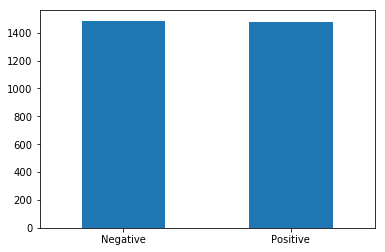

In [41]:
X.score_name.value_counts().plot(kind="bar", rot=0)

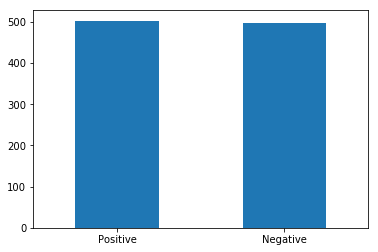

In [42]:
X_sample.score_name.value_counts().plot(kind="bar", rot=0)

# 5.2 Feature Creation

In [43]:
# takes a like a minute or two to process
X['unigrams'] = X['sentence'].apply(lambda x: dmh.tokenize_text(x))

In [44]:
X[0:4]["unigrams"]

0    [So, there, is, no, way, for, me, to, plug, it...
1                 [Good, case, ,, Excellent, value, .]
2                        [Great, for, the, jawbone, .]
3    [Tied, to, charger, for, conversations, lastin...
Name: unigrams, dtype: object

In [45]:
list(X[0:1]['unigrams'])

[['So',
  'there',
  'is',
  'no',
  'way',
  'for',
  'me',
  'to',
  'plug',
  'it',
  'in',
  'here',
  'in',
  'the',
  'US',
  'unless',
  'I',
  'go',
  'by',
  'a',
  'converter',
  '.']]

# 5.3 Feature subset selection

In [46]:
count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.sentence)

X_counts

<2966x5153 sparse matrix of type '<class 'numpy.int64'>'
	with 31452 stored elements in Compressed Sparse Row format>

In [47]:
analyze = count_vect.build_analyzer()
analyze(" ".join(list(X[4:5].sentence)))

['the', 'mic', 'is', 'great']

In [48]:
# We can check the shape of this matrix by:
X_counts.shape


(2966, 5153)

In [49]:
# We can obtain the feature names of the vectorizer, i.e., the terms
count_vect.get_feature_names()[0:10]

['00', '10', '100', '11', '12', '13', '15', '15g', '15pm', '17']

In [50]:
X[0:5]

,sentence,score,score_name,unigrams
0,So there is no way for me to plug it in here i...,0,Negative,"[So, there, is, no, way, for, me, to, plug, it..."
1,"Good case, Excellent value.",1,Positive,"[Good, case, ,, Excellent, value, .]"
2,Great for the jawbone.,1,Positive,"[Great, for, the, jawbone, .]"
3,Tied to charger for conversations lasting more...,0,Negative,"[Tied, to, charger, for, conversations, lastin..."
4,The mic is great.,1,Positive,"[The, mic, is, great, .]"


In [51]:
X_counts[0:5].toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [52]:
count_vect.transform(['Something completely new.']).toarray()

array([[0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [53]:
count_vect.transform(['00 Something completely new.']).toarray()

array([[1, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [54]:
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names()[0:20]]

In [55]:
plot_x

['term_00',
 'term_10',
 'term_100',
 'term_11',
 'term_12',
 'term_13',
 'term_15',
 'term_15g',
 'term_15pm',
 'term_17',
 'term_18',
 'term_18th',
 'term_1928',
 'term_1947',
 'term_1948',
 'term_1949',
 'term_1971',
 'term_1973',
 'term_1979',
 'term_1980']

In [56]:
plot_y = ["sentence_"+ str(i) for i in list(X.index)[0:20]]
plot_y

['sentence_0',
 'sentence_1',
 'sentence_2',
 'sentence_3',
 'sentence_4',
 'sentence_5',
 'sentence_6',
 'sentence_7',
 'sentence_8',
 'sentence_9',
 'sentence_10',
 'sentence_11',
 'sentence_12',
 'sentence_13',
 'sentence_14',
 'sentence_15',
 'sentence_16',
 'sentence_17',
 'sentence_19',
 'sentence_20']

In [57]:
plot_z = X_counts[0:20, 0:20].toarray() # first 20 terms 
#plot_z = X_counts[:, :].toarray()
plot_z

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0,

In [58]:
# to plot
py.iplot(ta.plot_heat_map(plot_x, plot_y, plot_z))

# Exercise 3: 
From the chart above, we can see how sparse the term-document matrix is; i.e., there is only one terms with frequency of 1 in the subselection of the matrix. By the way, you may have noticed that we only selected 20 articles and 20 terms to plot the histrogram. As an excersise you can try to modify the code above to plot the entire term-document matrix or just a sample of it.

In [59]:
# The entire sample(n=1000) term-document matirx
# New vectorizer Data Set
count_sample_vect = CountVectorizer()
X_sample_counts = count_sample_vect.fit_transform(X_sample.sentence)
print (X_sample_counts.shape)

(1000, 2663)


In [60]:
plot_x = ["term_"+str(i) for i in count_sample_vect.get_feature_names()]
plot_y = ["sentence_"+ str(i) for i in list(X_sample.index)]
plot_z = X_sample_counts.toarray()
py.iplot(ta.plot_heat_map(plot_x, plot_y, plot_z))

The draw time for this plot will be slow for all clients.


C:\Users\Daniel\Anaconda3\lib\site-packages\plotly\api\v1\clientresp.py:40: UserWarning:

Estimated Draw Time Too Long



In [61]:
X_counts.shape

(2966, 5153)

In [62]:
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names()[30:60]]
# len(plot_x) # 35788
plot_y = ["sentence_"+ str(i) for i in list(X.index)[0:100]]
# len(plot_y) # 2966

# X_counts[sentences id, terms array]
plot_z = X_counts[0:100, 30:60].toarray()

# "Terms #30~60 frequency in First 100 sentences"
py.iplot(ta.plot_heat_map(plot_x, plot_y, plot_z))

# 5.4 Dimensionality Reduction

In [63]:
from sklearn.decomposition import PCA

In [64]:
X_reduced = PCA(n_components=3).fit_transform(X_counts.toarray())

In [65]:
X_reduced.shape

(2966, 3)

In [66]:
X_reduced

array([[ 0.51682782,  0.27900211, -1.32231071],
       [-0.90241341, -0.36281654,  0.22895741],
       [ 0.01407891, -0.66628775,  0.09331076],
       ..., 
       [-0.50570304,  0.41599002,  0.67098896],
       [ 0.49212522,  0.36941722,  0.32596166],
       [ 2.32719776, -0.47736886, -1.17473293]])

In [67]:
trace1 = ta.get_trace(X_reduced, X["score_name"], "Positive", "rgb(71,233,163)")
trace2 = ta.get_trace(X_reduced, X["score_name"], "Negative", "rgb(52,133,252)")


In [68]:
trace1.x

array([-0.90241341,  0.01407891,  0.12918708, ...,  0.44215456,
       -0.73942433, -0.77046426])

In [69]:
data = [trace1, trace2]

In [70]:
layout = go.Layout(
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0
    )
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='simple-3d-scatter')

# 5.5 Atrribute Transformation / Aggregation

In [71]:
# note this takes time to compute. You may want to reduce the amount of terms you want to compute frequencies for
term_frequencies = []
for j in range(0,X_counts.shape[1]):
    term_frequencies.append(sum(X_counts[:,j].toarray()))

In [72]:
term_frequencies[0]

array([1], dtype=int64)

In [73]:
py.iplot(ta.plot_word_frequency([count_vect.get_feature_names(), 
                                 term_frequencies], "Term Frequency Distribution"))

# Exercise 4: 
The chart above contains all the vocabulary, and it's computationally intensive to both compute and visualize. You can try to reduce the number of terms you want to visualize as an exercise.

In [74]:
list1 = term_frequencies
list2 = count_vect.get_feature_names()

py.iplot(ta.plot_word_frequency([list2, list1[0:1000]],
                                "Term Frequency Distribution, first 1000 terms"))

# Exercise 5: 
Additionally, you can attempt to sort the terms on the x-axis by frequency instead of in alphabetical order.

In [75]:
# sort terms  in descending order
list1, list2 = zip(*sorted(zip(list1, list2 ),reverse=True))

py.iplot(ta.plot_word_frequency([list2, list1[0:500]],
                                "Term Frequency Distribution, first 500 terms(Descending order)"))

since we have those term frequencies, we can also transform the values in that vector into the log distribution. 

In [76]:
term_frequencies_log = [math.log(i) for i in term_frequencies]

In [77]:
py.iplot(ta.plot_word_frequency([count_vect.get_feature_names(), term_frequencies_log],
                                "Term Frequency Distribution"))

# 5.6 Discretization and Binarization

In [78]:
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy

In [79]:
mlb = preprocessing.LabelBinarizer()

In [80]:
mlb.fit(X.score)

LabelBinarizer(neg_label=0, pos_label=1, sparse_output=False)

In [81]:
mlb.classes_

array(['0', '1'], 
      dtype='<U1')

In [82]:
X['bin_score'] = mlb.transform(X['score']).tolist()

In [83]:
X[0:9]

,sentence,score,score_name,unigrams,bin_score
0,So there is no way for me to plug it in here i...,0,Negative,"[So, there, is, no, way, for, me, to, plug, it...",[0]
1,"Good case, Excellent value.",1,Positive,"[Good, case, ,, Excellent, value, .]",[1]
2,Great for the jawbone.,1,Positive,"[Great, for, the, jawbone, .]",[1]
3,Tied to charger for conversations lasting more...,0,Negative,"[Tied, to, charger, for, conversations, lastin...",[0]
4,The mic is great.,1,Positive,"[The, mic, is, great, .]",[1]
5,I have to jiggle the plug to get it to line up...,0,Negative,"[I, have, to, jiggle, the, plug, to, get, it, ...",[0]
6,If you have several dozen or several hundred c...,0,Negative,"[If, you, have, several, dozen, or, several, h...",[0]
7,If you are Razr owner...you must have this!,1,Positive,"[If, you, are, Razr, owner, ..., you, must, ha...",[1]
8,"Needless to say, I wasted my money.",0,Negative,"[Needless, to, say, ,, I, wasted, my, money, .]",[0]


# 6. Creativity and Presentation: 
For instance, you can present different visualizations and data operations provided in the **Data** handout (Session 1 of Data Mining). (Refer to the iLMS for the handout on **Data**). You can also tidy up your notebook and provide nice explanations or comments where necessary, especially for the new parts you have added. Surprise us! Good Luck!

In [84]:
# Get all positive words in each positive sentence
# Calcualte and Plot the term frequency of the positive words for dataset.

In [85]:
from nltk.corpus import stopwords

# stopword: commonn words or unimportant words
stopword = stopwords.words('english')

tokens = []

# get tokens from each positive sentence
for sentence in (X['sentence'][X['score']=='1']):
    tokens += dmh.tokenize_text(sentence.lower())

# remove tokens which are in the stopword list
tokens = [token for token in tokens if token not in stopword]

# Categorizing and Tagging Words
tokens_tags = nltk.pos_tag(tokens)

# get the positive tokens from all tokens
positive_tokens = [word for word, pos in tokens_tags if (pos == 'JJ' or pos =='RB')]

#print (positive_tokens[0])

In [86]:
positive_tokens_dict = ta.get_tokens_and_frequency(positive_tokens)
#list(positive_tokens_dict[0])[0:25]
py.iplot(ta.plot_word_frequency([list(positive_tokens_dict[0])[0:25],
                                 list(positive_tokens_dict[1])[0:25]], "Most 25 Positive Words Frequency distribution"))

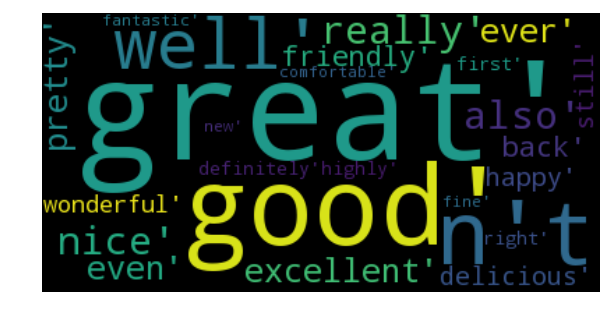

In [87]:
# Most 25 Positive Words
ta.plot_word_cloud(str(list(positive_tokens_dict[0])[0:25]))